<a href="https://colab.research.google.com/github/VilchisKarla/SIMULACION-I/blob/main/Aplicacion_TableroCircular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EJERCICIO** Tablero Circular

Lanzamos 2 monedas y avanzamos, en sentido horario, el número de caras que aparezcan. Si repetimos el procedimiento. ¿Son todos los sectores igualmente probables cuando pasa mucho tiempo?


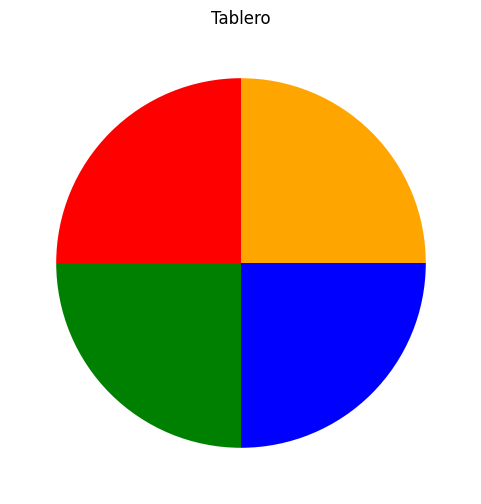

In [15]:
import matplotlib.pyplot as plt

# Configuración del plano
fig, ax = plt.subplots(figsize=(6, 6))

# Datos para los sectores
sizes = [90, 90, 90, 90]  # 4 sectores de 90° cada uno
colors = ['orange', 'blue', 'green', 'red']
labels = ['Naranja', 'Azul', 'Verde', 'Rojo']

# Crear el gráfico de pastel
ax.pie(sizes, colors=colors, startangle=90, counterclock=False)
plt.title('Tablero')
# Mostrar el gráfico
plt.show()

### Solución Analítica

nuestra variable de estado es la posición de la ficha. --> $x$

Los posibles estados de las monedas son:

$\frac{1}{4}$ {Sol, Sol}

$\frac{1}{2}$ {Sol,Águila},{Águila, Sol}

$\frac{1}{4}$ {Águila, Águila}

Entonces, sean:

$x_n$:probabilidad de estar en el sector naranja tras n tiros

$y_n$:probabilidad de estar en el sector azul tras n tiros

$z_n$:probabilidad de estar en el sector verde tras n tiros

$t_n$:probabilidad de estar en el sector rojo tras n tiros


Utilizando el teorema de la probabiliad total
$$P(A) = \sum_{i=1}^m P(A|B_i)P(B_i)$$

llegamos a la siguiente expresión:

$$\begin{bmatrix} x_n \\
y_n\\
z_n\\
t_n \end{bmatrix} = \begin{bmatrix} \frac{1}{4} & 0 & \frac{1}{4} & \frac{2}{4} \\
\frac{2}{4} & \frac{1}{4} & 0 & \frac{1}{4}\\
\frac{1}{4} & \frac{2}{4} & \frac{1}{4} & 0\\
0 & \frac{1}{4} & \frac{2}{4} & \frac{1}{4} \end{bmatrix} \begin{bmatrix} x_{n-1} \\
y_{n-1}\\
z_{n-1}\\
t_{n-1} \end{bmatrix}$$

Es decir, tenemos un sistema $X_n=AX_{n-1}$ que en general es $X_n=A^nX_0$

Para resolver el problema  bastaría con calcular $A^n$

Veamos que para n=30 ya tendremos la solución exacta

In [11]:
import numpy as np

# Definir la matriz A
A = np.array([
    [0.25, 0.00, 0.25, 0.50],
    [0.50, 0.25, 0.00, 0.25],
    [0.25, 0.50, 0.25, 0.00],
    [0.00, 0.25, 0.50, 0.25]
])

# Función para elevar la matriz A a la potencia n
def matriz_potencia(A, n):
    return np.linalg.matrix_power(A, n)

# Ejemplo: calcular A^30
n = 30
A_n = matriz_potencia(A, n)

print(f"A^{n} =\n", A_n)


A^30 =
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


###Simulación

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lanzamiento de 2 monedas (binomial)
def tiros():
    return np.random.binomial(1, 0.5, 2)

In [3]:
# Tablero circular
def tablero(pos, longitud):
    return pos % longitud

In [4]:
# Mover ficha en base al número de caras (soles)
def movimiento():
    m1, m2 = tiros()
    if m1 == 1 and m2 == 1:
        return 2
    elif (m1 == 1 and m2 == 0) or (m1 == 0 and m2 == 1):
        return 1
    else:
        return 0

In [5]:
# Simución de un juego
def juego(n):
    pos = 0 #indicador de la posicion
    colores = {0: 'Naranja', 1: 'Azul', 2: 'Verde', 3: 'Rojo'} #diccionario de los colores del tablero asignados a un nnúmero
    conteo = {color: 0 for color in colores.values()}  #lleva la cuenta de cuántas veces cae la ficha en cada color.

    for _ in range(n): #ciclo para los n turnos
        avance = movimiento() #cantidad de casillas a avanzar
        pos = tablero(pos + avance, 4) #nueva posición
        conteo[colores[pos]] += 1 #actualizar el contador del color en que cae
    proba = {color: count / n for color, count in conteo.items()} #calcula la  proba de caer en cada color
    return proba

#simulación de varios juegos
SIM = juego(1000000)

# Mostrar resultados
for color, cantidad in SIM.items():
    print(f"{color}: {cantidad}")

Naranja: 0.249742
Azul: 0.249697
Verde: 0.250091
Rojo: 0.25047


### **CONCLUSIÓN**

Después de muchos tiros, cada color es igualmente probable